In [4]:
import numpy as np 
import pandas as pd

In [5]:
df=pd.read_csv('./datasets/Mumbai_rent.csv')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,4.0,BHK,Independent Floor,Andheri West,"56,800",1201.0,Semi-Furnished,2 bathrooms
1,OWNER,1.0,BHK,Apartment,Andheri East,"26,000",595.0,Furnished,1 bathrooms
2,OWNER,1.0,BHK,Apartment,Mira Road East,"12,500",560.0,Unfurnished,2 bathrooms
3,OWNER,2.0,BHK,Apartment,Goregaon East,"36,000",860.0,Semi-Furnished,2 bathrooms
4,OWNER,2.0,BHK,Independent Floor,Ville Parle West,"65,000",1000.0,Furnished,3 bathrooms


In [6]:
df.drop(columns=['seller_type','layout_type','bathroom'],inplace=True)
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,4.0,Independent Floor,Andheri West,"56,800",1201.0,Semi-Furnished
1,1.0,Apartment,Andheri East,"26,000",595.0,Furnished
2,1.0,Apartment,Mira Road East,"12,500",560.0,Unfurnished
3,2.0,Apartment,Goregaon East,"36,000",860.0,Semi-Furnished
4,2.0,Independent Floor,Ville Parle West,"65,000",1000.0,Furnished


In [7]:
df.shape

(68518, 6)

In [8]:
df.isnull().sum()

bedroom          78
property_type    78
locality         79
price            78
area             78
furnish_type     78
dtype: int64

In [9]:
df['price'] = df['price'].str.replace(r'[^\d.]+', '', regex=True)

In [10]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [11]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,4.0,Independent Floor,Andheri West,56800.0,1201.0,Semi-Furnished
1,1.0,Apartment,Andheri East,26000.0,595.0,Furnished
2,1.0,Apartment,Mira Road East,12500.0,560.0,Unfurnished
3,2.0,Apartment,Goregaon East,36000.0,860.0,Semi-Furnished
4,2.0,Independent Floor,Ville Parle West,65000.0,1000.0,Furnished


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68518 entries, 0 to 68517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        68440 non-null  float64
 1   property_type  68440 non-null  object 
 2   locality       68439 non-null  object 
 3   price          68440 non-null  float64
 4   area           68440 non-null  float64
 5   furnish_type   68440 non-null  object 
dtypes: float64(3), object(3)
memory usage: 3.1+ MB


In [13]:
df["house_price"] = (df["price"] * 12 * 100) / 3

In [14]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,4.0,Independent Floor,Andheri West,56800.0,1201.0,Semi-Furnished,22720000.0
1,1.0,Apartment,Andheri East,26000.0,595.0,Furnished,10400000.0
2,1.0,Apartment,Mira Road East,12500.0,560.0,Unfurnished,5000000.0
3,2.0,Apartment,Goregaon East,36000.0,860.0,Semi-Furnished,14400000.0
4,2.0,Independent Floor,Ville Parle West,65000.0,1000.0,Furnished,26000000.0


In [15]:
df.bedroom.value_counts()

bedroom
1.0     28432
2.0     27522
3.0     10432
4.0      1898
5.0       123
6.0        25
7.0         3
8.0         2
10.0        2
9.0         1
Name: count, dtype: int64

In [16]:
df = df[df['bedroom'] <= 5]

In [17]:
df.property_type.value_counts()

property_type
Apartment            63566
Studio Apartment      4052
Independent House      460
Independent Floor      228
Villa                   98
Penthouse                3
Name: count, dtype: int64

In [18]:
df["property_type"] = df["property_type"].replace("Studio Apartment", "Apartment")
df["property_type"] = df["property_type"].replace("Independent Floor", "Villa")
df["property_type"] = df["property_type"].replace("Penthouse", "Villa")

In [19]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,4.0,Villa,Andheri West,56800.0,1201.0,Semi-Furnished,22720000.0
1,1.0,Apartment,Andheri East,26000.0,595.0,Furnished,10400000.0
2,1.0,Apartment,Mira Road East,12500.0,560.0,Unfurnished,5000000.0
3,2.0,Apartment,Goregaon East,36000.0,860.0,Semi-Furnished,14400000.0
4,2.0,Villa,Ville Parle West,65000.0,1000.0,Furnished,26000000.0


In [20]:
df.locality.value_counts().describe()

count     728.000000
mean       93.964286
std       374.954840
min         1.000000
25%         1.000000
50%         3.000000
75%        12.000000
max      4515.000000
Name: count, dtype: float64

In [21]:
locality_counts = df["locality"].value_counts()
df = df[df["locality"].isin(locality_counts[locality_counts >=10].index)]

In [22]:
df.locality.nunique()

200

In [23]:
df.shape

(67155, 7)

In [24]:
df.furnish_type.value_counts()

furnish_type
Semi-Furnished    28578
Unfurnished       24004
Furnished         14573
Name: count, dtype: int64

In [25]:
df["furnish_type"] = df["furnish_type"].replace("Semi-Furnished", "Furnished")

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

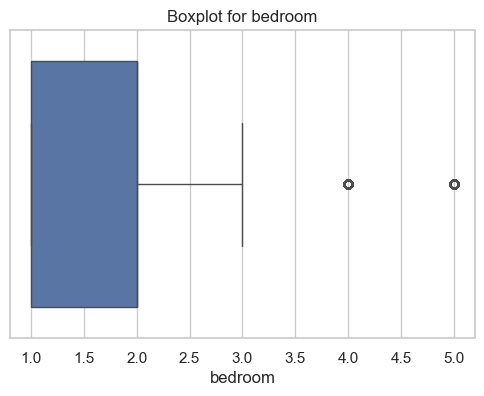

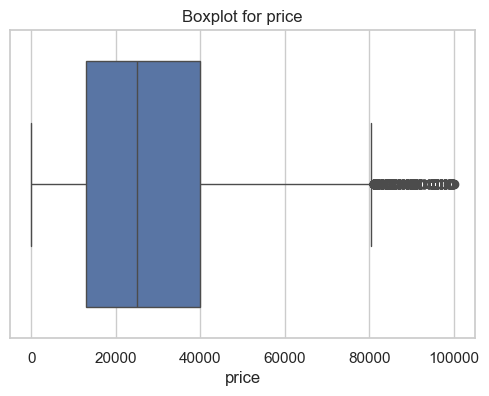

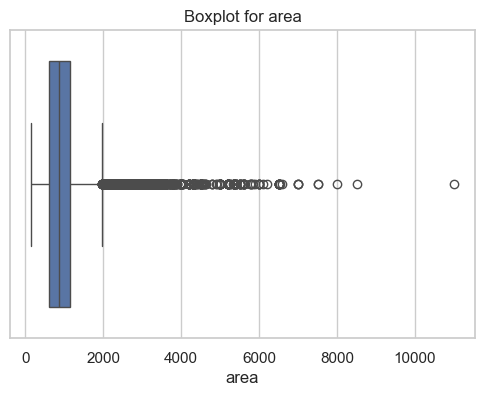

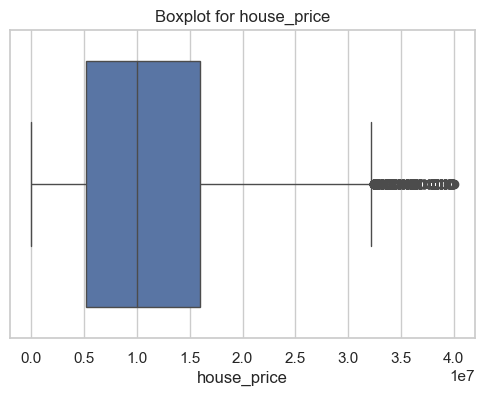

In [27]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

df_numeric = df.select_dtypes(include=['float64', 'int64'])  
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [28]:
for column in df_numeric.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [29]:
df.shape

(60601, 7)

In [30]:
df.drop(columns=['price'],inplace=True)

In [31]:
df.rename(columns={'house_price': 'price'}, inplace=True)

In [32]:
df.head()

,bedroom,property_type,locality,area,furnish_type,price
1,1.0,Apartment,Andheri East,595.0,Furnished,10400000.0
2,1.0,Apartment,Mira Road East,560.0,Unfurnished,5000000.0
3,2.0,Apartment,Goregaon East,860.0,Furnished,14400000.0
4,2.0,Villa,Ville Parle West,1000.0,Furnished,26000000.0
5,1.0,Apartment,Andheri East,200.0,Furnished,14400000.0


In [33]:
df = pd.get_dummies(df).astype(int)

In [34]:
df['price'] = df['price'] / 100000

In [35]:
df.head()

,bedroom,area,price,property_type_Apartment,property_type_Independent House,property_type_Villa,locality_Additional M.I.D.C,locality_Agripada,locality_Airoli,locality_Ambernath East,...,locality_lower parel west,locality_matunga east,locality_mumbai,locality_raheja vihar,locality_thakur village kandivali east,locality_vile parle west,locality_worli sea Fase,locality_yogi nagar,furnish_type_Furnished,furnish_type_Unfurnished
1,1,595,104.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,560,50.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,860,144.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,1000,260.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,200,144.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df.shape

(60601, 207)

In [37]:
df.columns = df.columns.str.lower()

In [38]:
df.head()

,bedroom,area,price,property_type_apartment,property_type_independent house,property_type_villa,locality_additional m.i.d.c,locality_agripada,locality_airoli,locality_ambernath east,...,locality_lower parel west,locality_matunga east,locality_mumbai,locality_raheja vihar,locality_thakur village kandivali east,locality_vile parle west,locality_worli sea fase,locality_yogi nagar,furnish_type_furnished,furnish_type_unfurnished
1,1,595,104.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,560,50.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,860,144.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,1000,260.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,200,144.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
target=df.price
df.drop(columns=['price'],inplace=True)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2,random_state=10)

In [41]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.46308467654820085

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), df,target, cv=cv)

array([0.46599469, 0.46419497, 0.46813857, 0.46797757, 0.45672605])

In [43]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(df,target)

,model,best_score,best_params
0,linear_regression,0.464606,{'fit_intercept': True}
1,lasso,0.407769,"{'alpha': 0.1, 'selection': 'random'}"
2,decision_tree,0.777015,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [44]:
model=DecisionTreeRegressor(criterion= 'friedman_mse',splitter='random')

In [45]:
model.fit(df,target)

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [46]:
model.score(X_test, y_test)

0.887473450841786

In [47]:
import pickle
with open('Mumbai_model.pickle','wb') as f:
    pickle.dump(model,f)

In [48]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("Mumbai_columns.json","w") as f:
    f.write(json.dumps(columns))